# Supporting files `utils.py`#
> Methods for setting axes, saving, exporting to files

In [1]:
import matplotlib.pyplot as plt
plt.style.use("ilya_plot")

# Curvature at the flat regions `curvature.py` #
> - Generates parameters for the curvature in different papers

In [1]:
import curvature

In [2]:
zhu2010 = curvature.extract_curve_from_image(
        "data/zhu2010.png", [20, 100], [20, 100], [100, 250], [-0.01, 0.01], [2, 8]
    )

In [3]:
stern2014 = curvature.extract_curve_from_image(
        "data/stern2014.png", [230, 260], [0, 2], [0, 30], [-0.003, 0.003], [8.4, 9]
    )

In [4]:
gustavsson2012 = curvature.extract_curve_from_image(
        "data/gustavsson2012.png",
        [60, 140],
        [60, 120],
        [160, 180],
        [-0.005, 0.005],
        [2, 4],
    )

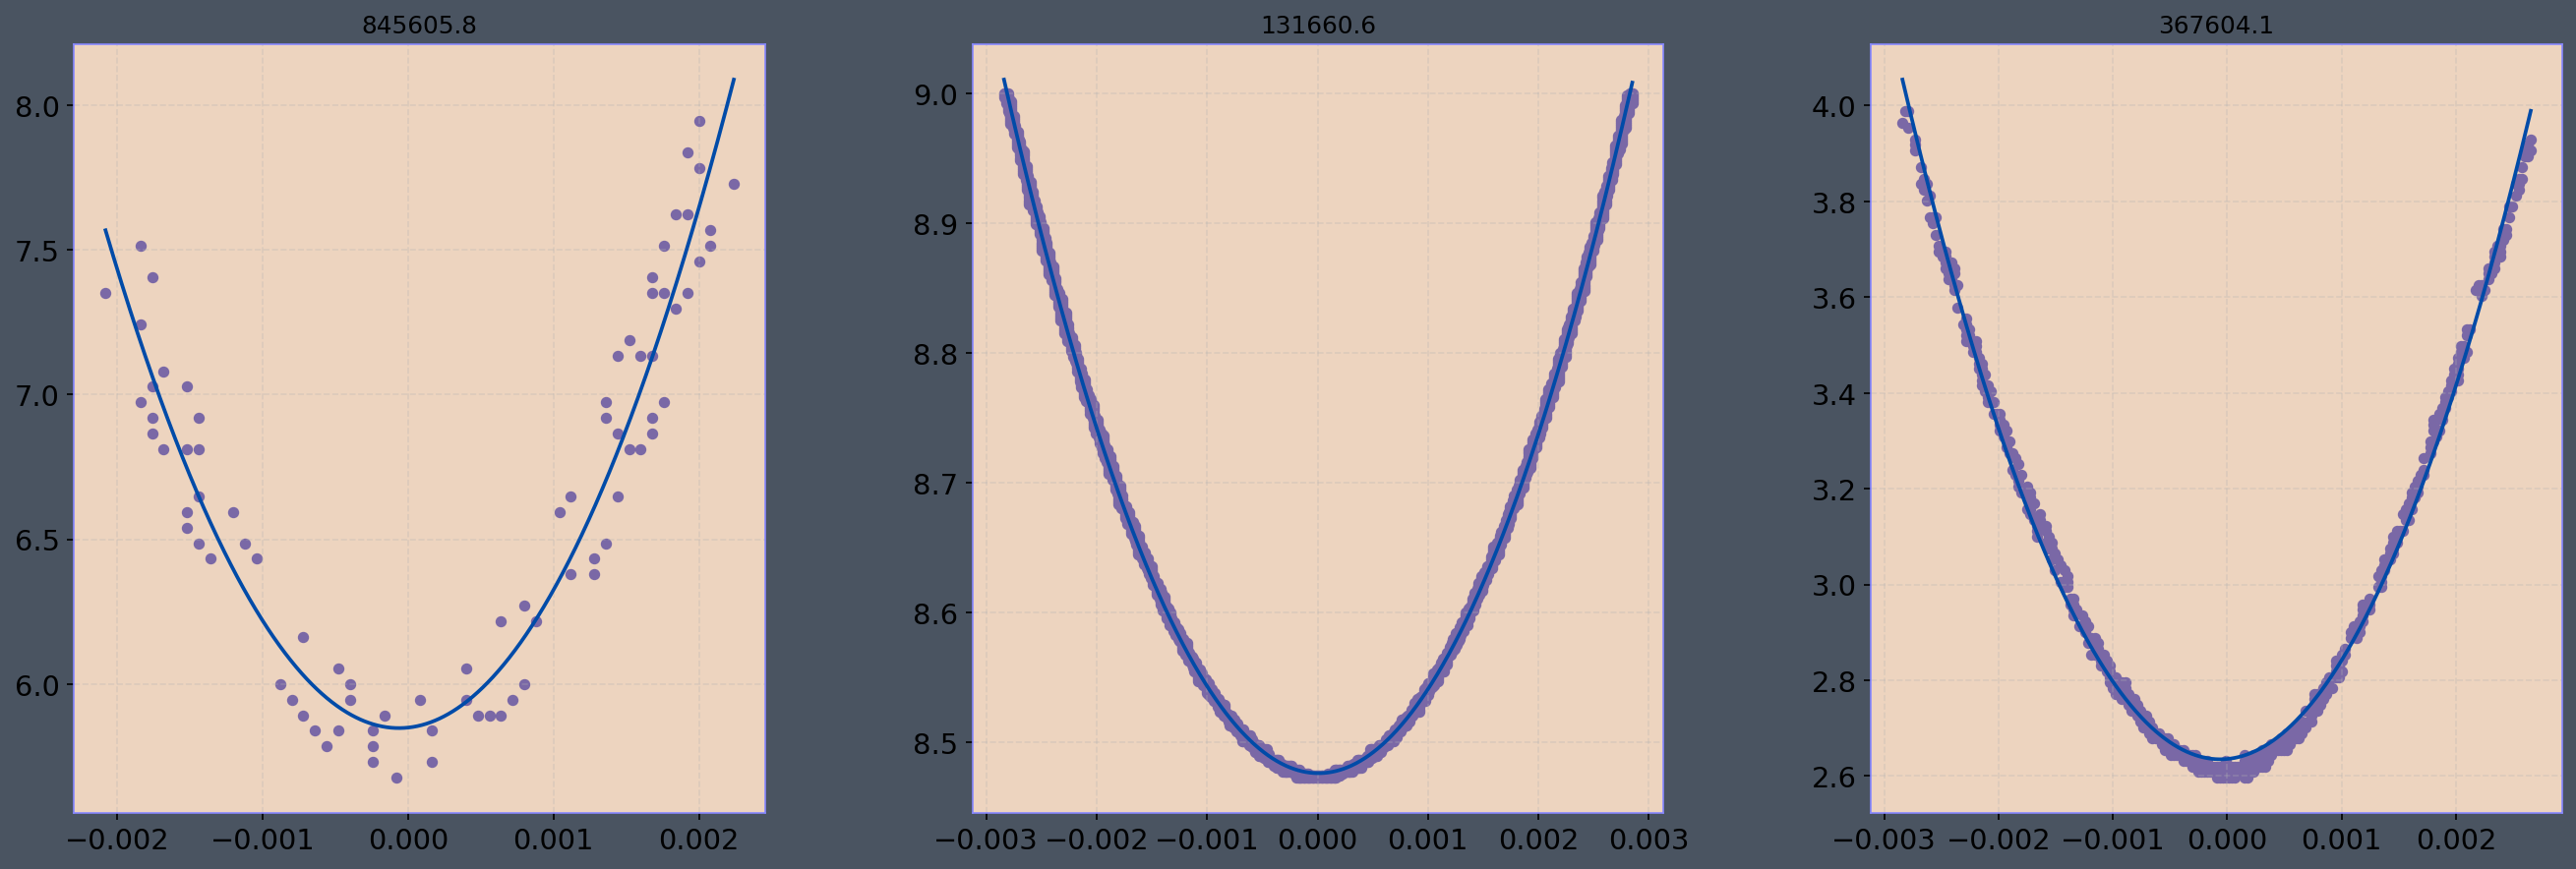

In [7]:
fig = plt.figure(figsize=(20, 7))
ax = fig.subplots(nrows=1, ncols=3)
curvature.fit_and_plot_parabolla(zhu2010, ax[0])
curvature.fit_and_plot_parabolla(stern2014, ax[1])
curvature.fit_and_plot_parabolla(gustavsson2012, ax[2])

# Rabi and Transmission plots `graph_analysis.py`#
> **Generates**
> - `fig2_transmission.svg`: fit to the transmission dip
> - `fig5_rabi.svg` oscillations

In [ ]:
import graph_analysis

# Fitting the spectrum
> Need to import the `TwinQubit` class

In [5]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ilya_plot")

from quantum_builder import QuantumBuilder

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 2,
    "states_per_island": 9,
}
FLUX_LIST = np.linspace(0.3, 0.7, 500)
EC = 13.5
EJ = 91

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_LIST, logging_level=logging.INFO
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
twin_qubit.run_simulation(evaluate_dipole_element=True)

twin_qubit_state_manager:22:verify_simulation_parameters
⮑  ⚙ Quantum state manager is using:
9     states per island
729   total states


twin_qubit_constant_manager:150:print_constants
⮑  ⚛ Constant Manager using parameters:
EC:                           13.5
EJ:                           91
alpha:                        1.023
assymetry:                    1
jj_critical_current:          3.1172453105244715e-08
jj_resistance:                9200.0
jj_capacitance:               4.071e-15
capacitance_matrix:           
[[ 2.    -1.     0.   ]
 [-1.     3.023 -1.   ]
 [ 0.    -1.     2.   ]]

twin_qubit_hamiltonian_manager:154:print_skeleton_information
⮑  🏗 Skeleton Hamiltonian Information
charge              row  729    col  729    elm  729    
phi1                row  1296   col  1296   elm  1296   
phi2                row  1296   col  1296   elm  1296   
phi3                row  1296   col  1296   elm  1296   
+phi1-phi2+phiExt   row  576    col  576    elm  576    
-phi1+phi2-phiExt

> Plot the sparse matrix to make sure we build correctly

In [6]:
if QUBIT_PARAMETERS["states_per_island"] < 7:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.subplots(nrows=1, ncols=1)
    twin_qubit.plot_sparse_matrix(ax)
else:
    logging.info("Skipping plotting matrix as it is very large")

<ipython-input-6-fc11b1cad615>:6:<module>
⮑  Skipping plotting matrix as it is very large



> Plot for spectrum and matrix elements

<IPython.core.display.Javascript object>


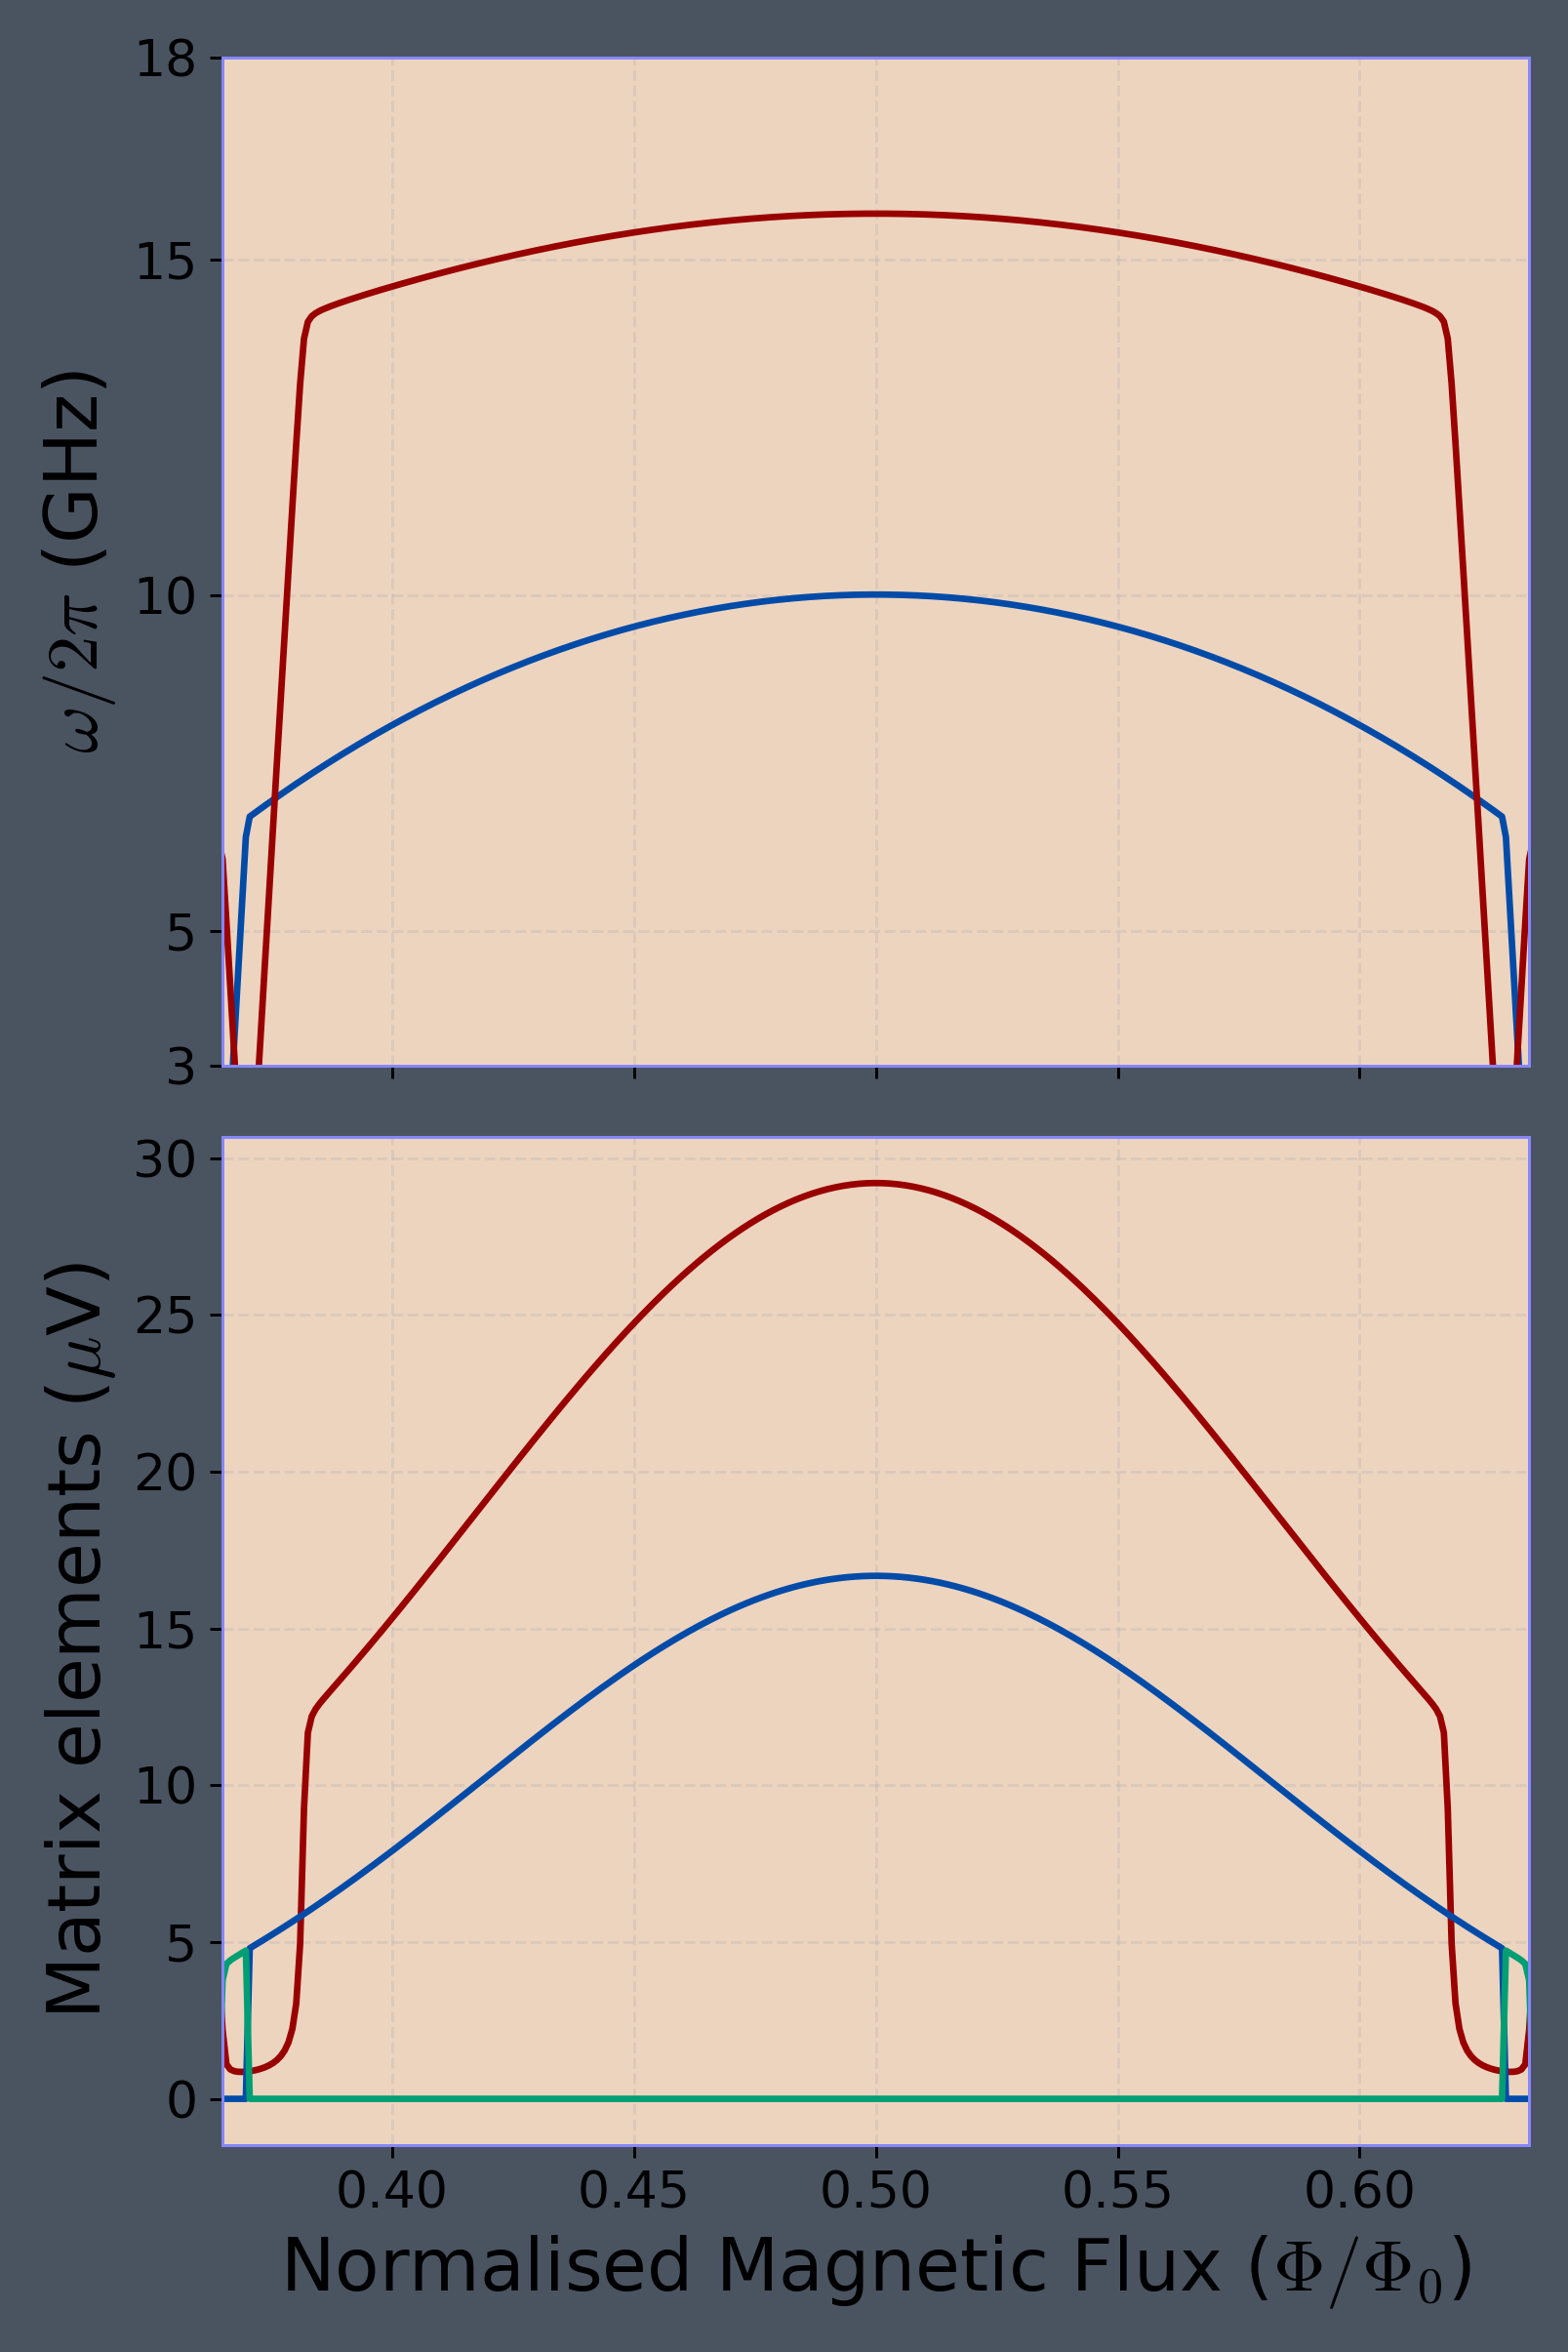

In [13]:
fig = plt.figure(figsize=(6, 9))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0")
ax[0].plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4")
ax[0].set_ylabel("$\omega/2\pi$ (GHz)")
ax[0].set_ylim([3, 18])
ax[0].set_yticks([3, 5, 10, 15, 18])

ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]) * 10**6, color='C4')
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]) * 10**6, color="C0")
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]) * 10**6, color="C6")
ax[1].set_xlabel("Normalised Magnetic Flux ($\Phi/\Phi_0$)")
ax[1].set_ylabel(r"Matrix elements ($\mu$V)")
ax[1].set_xlim([0.365, 0.635])

plt.tight_layout()
plt.show()

> Add the assymetric results

In [24]:
QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 2,
    "states_per_island": 9,
}
twin_qubit_ass = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_LIST, logging_level=logging.WARNING
)
twin_qubit_ass.override_parameters(EC=EC, EJ=EJ)
twin_qubit_ass.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:11


<IPython.core.display.Javascript object>


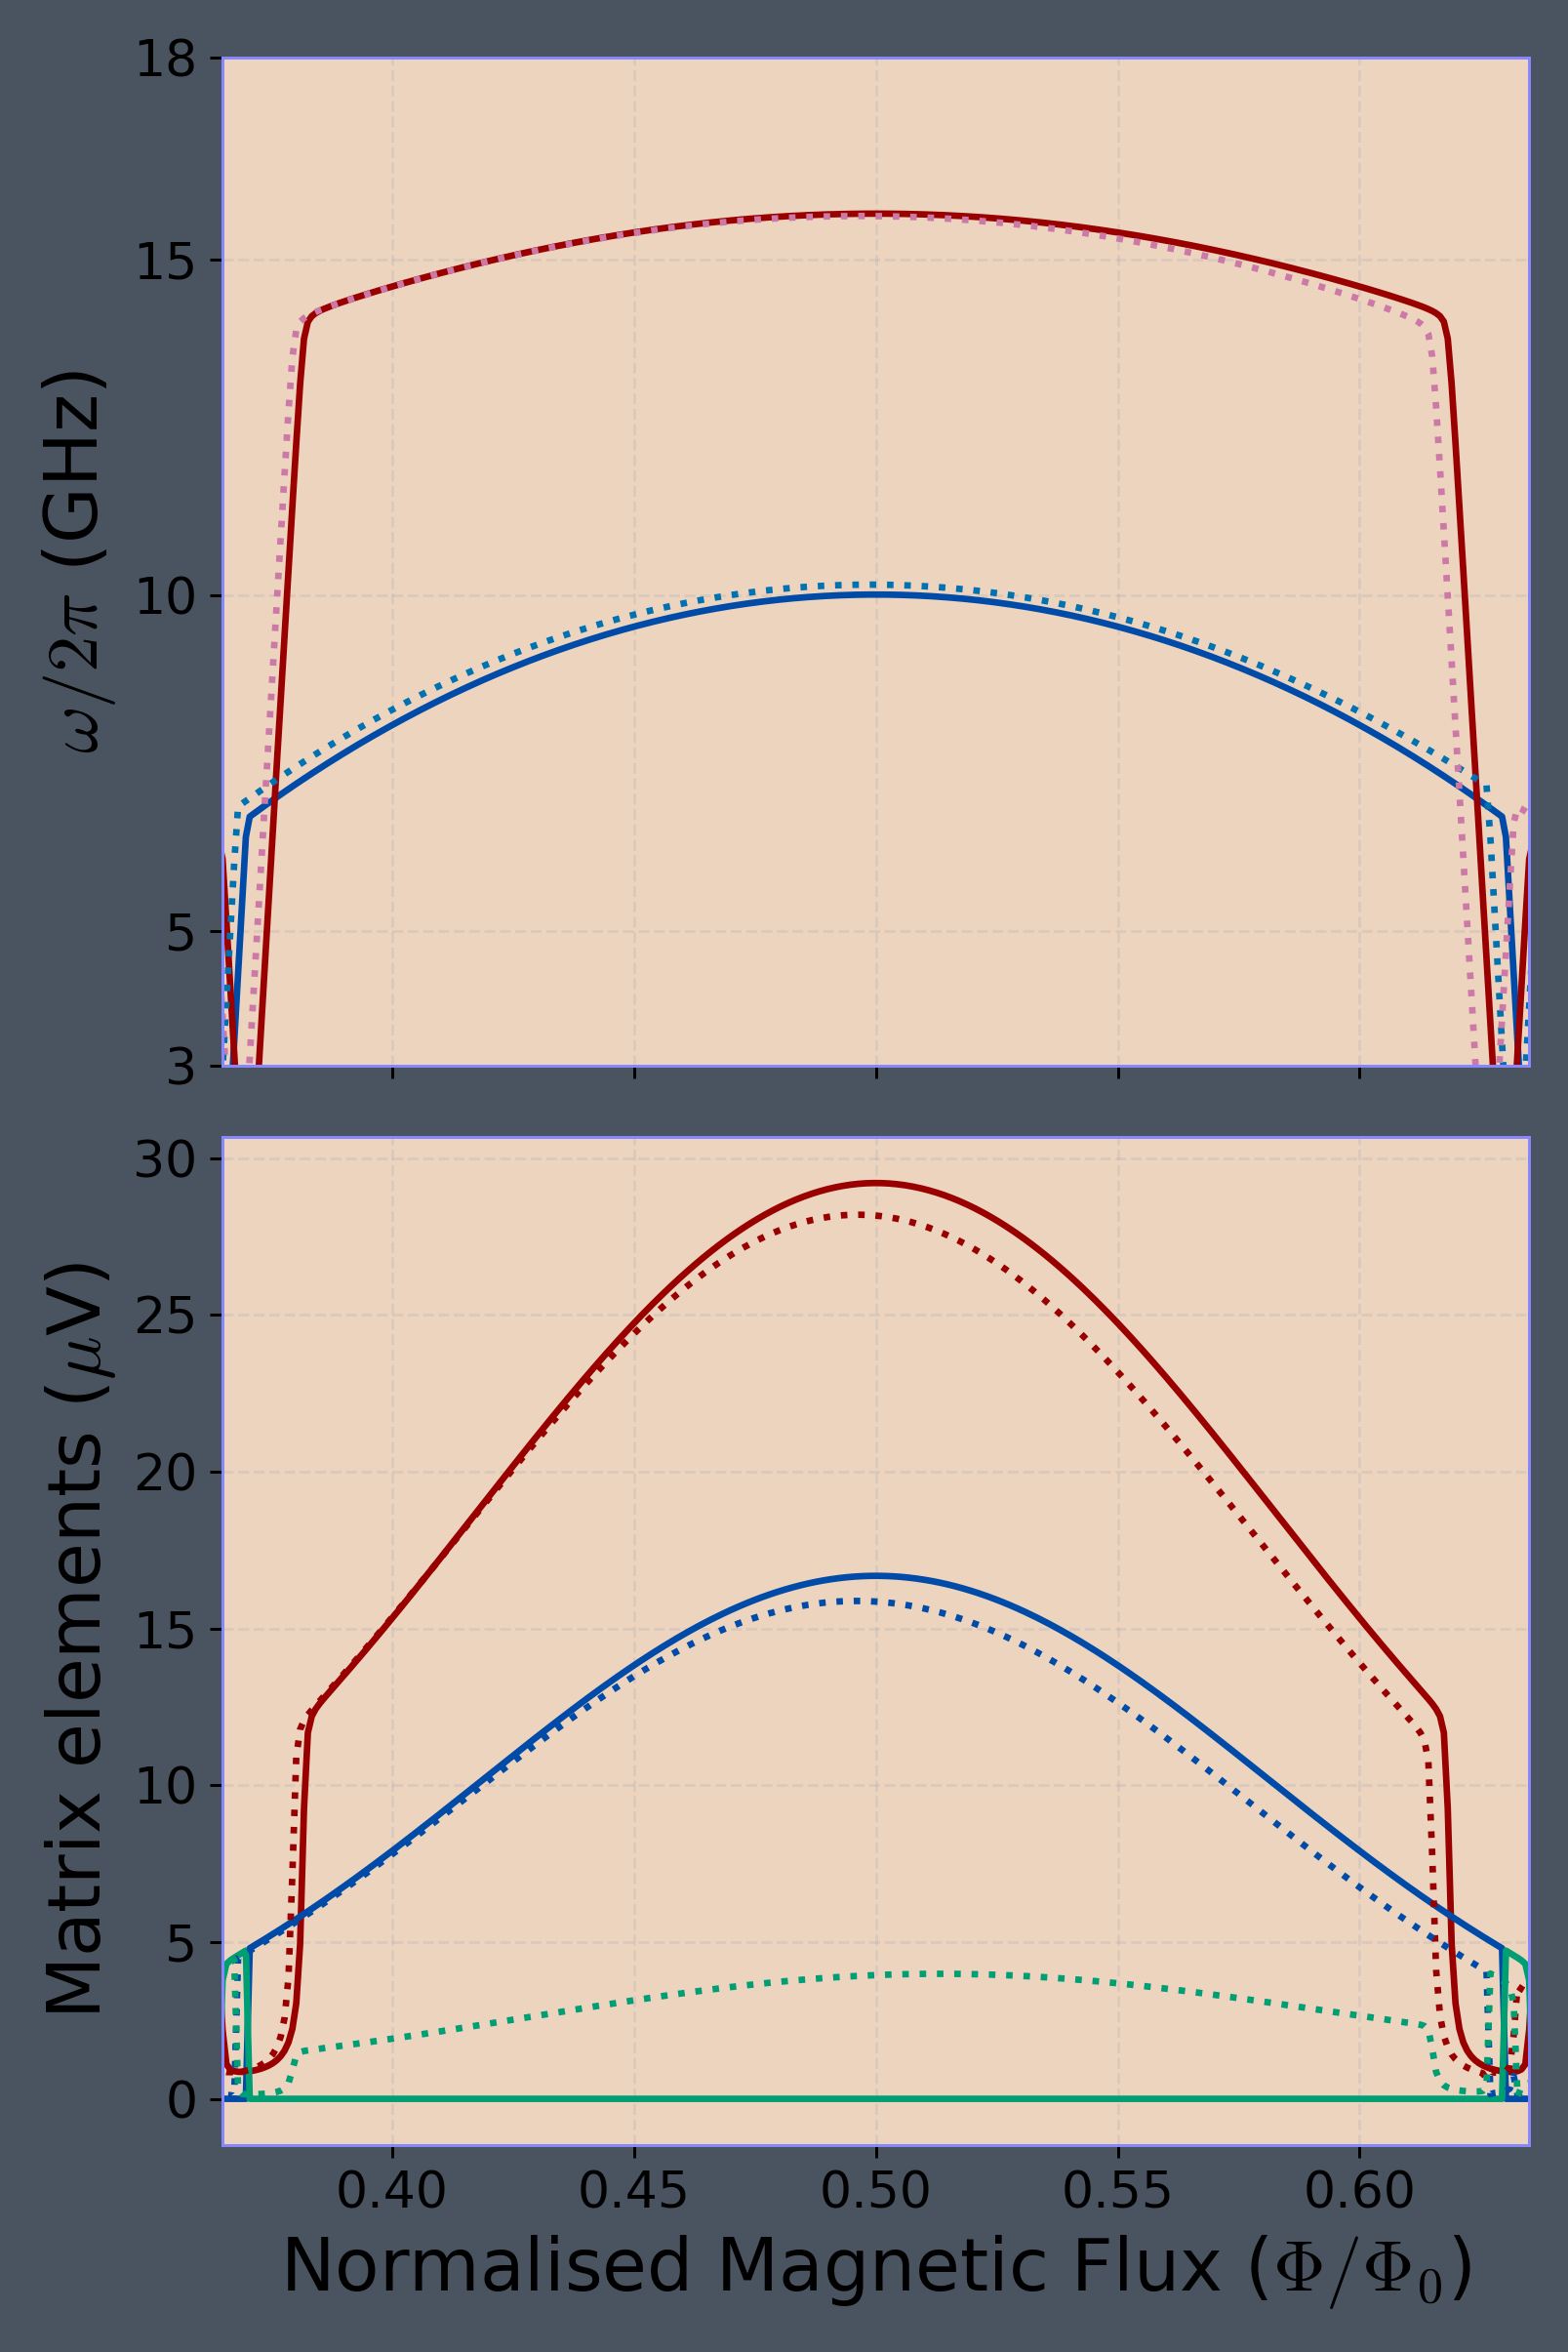

In [25]:
fig_ass = plt.figure(figsize=(6, 9))
ax_ass = fig_ass.subplots(nrows=2, ncols=1, sharex=True)

ax_ass[0].plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0")
ax_ass[0].plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4")
ax_ass[0].set_ylabel("$\omega/2\pi$ (GHz)")
ax_ass[0].set_ylim([3, 18])
ax_ass[0].set_yticks([3, 5, 10, 15, 18])

ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]) * 10**6, color='C4')
ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]) * 10**6, color="C0")
ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]) * 10**6, color="C6")
ax_ass[1].set_xlabel("Normalised Magnetic Flux ($\Phi/\Phi_0$)")
ax_ass[1].set_ylabel(r"Matrix elements ($\mu$V)")
ax_ass[1].set_xlim([0.365, 0.635])

ax_ass[0].plot(twin_qubit_ass.flux_list, twin_qubit_ass.simulations["1-2"], color="C1", linestyle=":")
ax_ass[0].plot(twin_qubit_ass.flux_list, twin_qubit_ass.simulations["2-3"], color="C5", linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d32"]) * 10**6, color='C4', linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d21"]) * 10**6, color="C0", linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d13"]) * 10**6, color="C6", linestyle=":")

plt.tight_layout()
plt.show()

In [ ]:
plt.savefig(f".svg", transparent=True)